# Analysis of Weight Categories Among Adults in the United States

## Introduction
In this project, we would explore a dataset about the weight categories of adults aged 20 and over in the United States. This dataset encompasses a range of years and presents data on normal weight, overweight, and obesity percentages among the adult population. This analysis is crucial in understanding the trends and patterns in adult weight categories, which are pivotal for public health planning and interventions.

## Dataset Overview
The dataset is from data.gov, could be found at https://catalog.data.gov/dataset/normal-weight-overweight-and-obesity-among-adults-aged-20-and-over-by-selected-characteris-8e2b1. It has several key features, including year, age groups, and estimates of the population percentages in different weight categories. The data provides a rich source for examining changes over time and across different demographic slices.

## Research Questions
The analysis would base on these research questions:
1. How have the percentages of adults in normal weight, overweight, and obese categories changed over the years?
3. Does the data show trends in weight categories based on other demographic characteristics?
4. What is the trend in standard errors (SE) over the years for each weight category, and what does it suggest about data reliability or population health patterns?
5. How does the distribution of weight categories vary over different time periods?
5. What are the top 3 periods with the highest average percentages for obesity?
6. What is the proportion of each weight category in the most recent year available in the dataset?

## Skills and Tools Used
We will employ various data analysis skills and tools, primarily focusing on:
- **Python Programming**: For all aspects of data handling and processing.
- **Pandas Library**: For data manipulation and analysis.
- **Matplotlib and Seaborn Libraries**: For data visualization to aid in interpreting the data and presenting our findings.
- **Exploratory Data Analysis Techniques**: To uncover underlying patterns and insights in the dataset.




# Data Loading

The dataset is loaded using Pandas. The initial few rows are displayed to understand the structure and content of the data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('weightData.csv')

# Display the first few rows to understand the structure
print(data.head())


                                           INDICATOR  \
0  Normal weight, overweight, and obesity among a...   
1  Normal weight, overweight, and obesity among a...   
2  Normal weight, overweight, and obesity among a...   
3  Normal weight, overweight, and obesity among a...   
4  Normal weight, overweight, and obesity among a...   

                                   PANEL  PANEL_NUM  \
0  Normal weight (BMI from 18.5 to 24.9)          1   
1  Normal weight (BMI from 18.5 to 24.9)          1   
2  Normal weight (BMI from 18.5 to 24.9)          1   
3  Normal weight (BMI from 18.5 to 24.9)          1   
4  Normal weight (BMI from 18.5 to 24.9)          1   

                                  UNIT  UNIT_NUM STUB_NAME  STUB_NAME_NUM  \
0  Percent of population, age-adjusted         1     Total              1   
1  Percent of population, age-adjusted         1     Total              1   
2  Percent of population, age-adjusted         1     Total              1   
3  Percent of population

# Data Cleaning and Preprocessing

First, we check for any missing values in the dataset. Depending on the nature and amount of missing data, appropriate actions like dropping or filling missing values are taken. Additionally, data type conversions are performed as needed for accurate analysis.


In [2]:

# Checking for missing values
print(data.isnull().sum())


INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           461
SE                 461
FLAG              2516
dtype: int64


## Research Question 1 How has the percentage of adults in the different weight categories changed over the years?
We will group the data by 'YEAR' and 'PANEL' (which represents weight categories) and calculate the average percentage for each category over the years



/tmp/ipykernel_2072/4186830653.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trends_over_years = data.groupby(['YEAR', 'PANEL']).mean().reset_index()


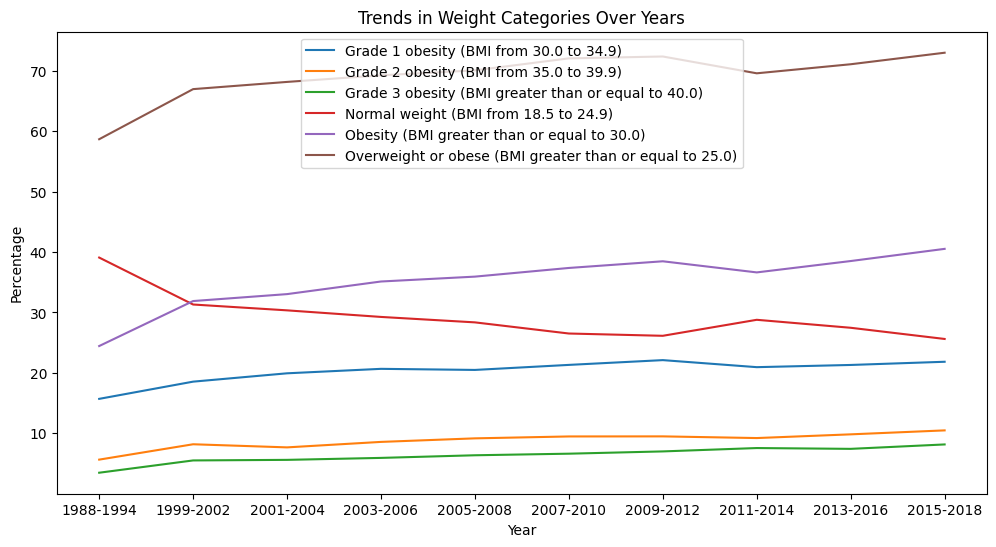

In [3]:
# Group by 'YEAR' and 'PANEL' and calculate mean
trends_over_years = data.groupby(['YEAR', 'PANEL']).mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for category in trends_over_years['PANEL'].unique():
    plt.plot(trends_over_years[trends_over_years['PANEL'] == category]['YEAR'], 
             trends_over_years[trends_over_years['PANEL'] == category]['ESTIMATE'],
             label=category)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Trends in Weight Categories Over Years')
plt.legend()
plt.show()

We can see that the trends of people in normal weight is keep declining and the rest are rising over years.


# Research Question 2: Are there significant differences in weight categories across different age groups?
To analyze the differences in weight categories across different age groups, we'll use a function to calculate the average percentage for each weight category within each age group.

In [4]:
def analyze_weight_by_age_group(data):
    age_group_analysis = data.groupby(['AGE', 'PANEL']).mean()['ESTIMATE'].unstack()
    return age_group_analysis

# Applying the function
age_group_analysis = analyze_weight_by_age_group(data)
print(age_group_analysis)



PANEL              Grade 1 obesity (BMI from 30.0 to 34.9)  \
AGE                                                          
20 years and over                                20.498913   
20-34 years                                      15.670000   
35-44 years                                      20.455000   
45-54 years                                      20.845000   
55-64 years                                      23.265000   
65-74 years                                      22.215000   
75 years and over                                18.335000   

PANEL              Grade 2 obesity (BMI from 35.0 to 39.9)  \
AGE                                                          
20 years and over                                 9.022951   
20-34 years                                       6.950000   
35-44 years                                       8.945000   
45-54 years                                       9.200000   
55-64 years                                       9.465000   
65-74 y

/tmp/ipykernel_2072/1371579442.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_group_analysis = data.groupby(['AGE', 'PANEL']).mean()['ESTIMATE'].unstack()


# Research Question 3: What is the trend in standard errors (SE) over the years for each weight category?
This question focuses on the reliability of data over time. We'll examine how the standard error for each weight category has changed over the years.

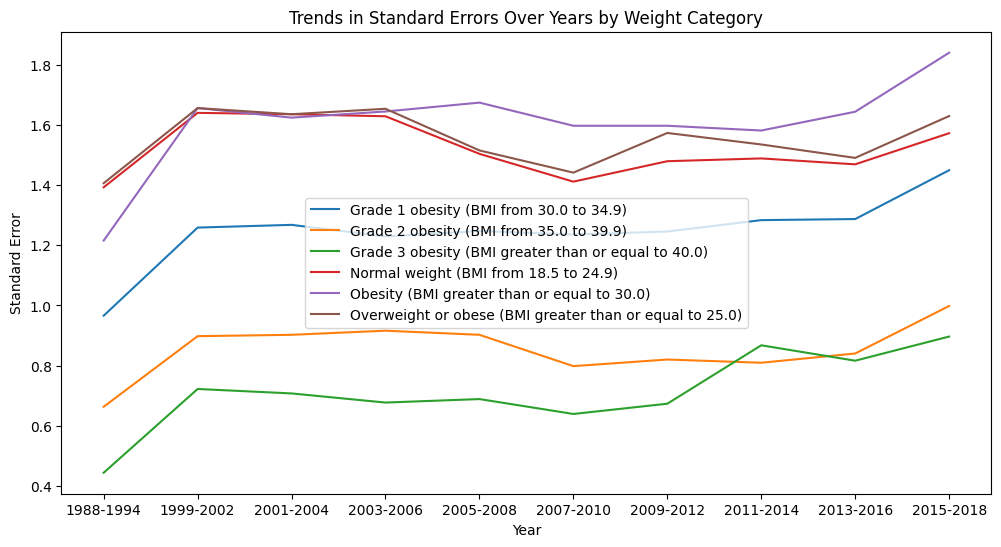

In [5]:
# Group by 'YEAR' and 'PANEL' for SE
se_trends_over_years = data.groupby(['YEAR', 'PANEL'])['SE'].mean().reset_index()

# Plotting SE trends
plt.figure(figsize=(12, 6))
for category in se_trends_over_years['PANEL'].unique():
    plt.plot(se_trends_over_years[se_trends_over_years['PANEL'] == category]['YEAR'], 
             se_trends_over_years[se_trends_over_years['PANEL'] == category]['SE'],
             label=category)
plt.xlabel('Year')
plt.ylabel('Standard Error')
plt.title('Trends in Standard Errors Over Years by Weight Category')
plt.legend()
plt.show()


# Research Question 4: How does the distribution of weight categories vary over different time periods?
We will create a function to calculate the mean and standard deviation of weight categories for each time period. This statistical analysis will give us an insight into the distribution and variability of weight categories over time

In [6]:
def weight_distribution_over_time(data):
    distribution_over_time = data.groupby(['YEAR', 'PANEL']).agg(['mean', 'std'])['ESTIMATE']
    return distribution_over_time

# Applying the function
time_distribution_analysis = weight_distribution_over_time(data)
print(time_distribution_analysis)

                                                                   mean  \
YEAR      PANEL                                                           
1988-1994 Grade 1 obesity (BMI from 30.0 to 34.9)             15.709091   
          Grade 2 obesity (BMI from 35.0 to 39.9)              5.655814   
          Grade 3 obesity (BMI greater than or equal to 4...   3.489189   
          Normal weight (BMI from 18.5 to 24.9)               39.086364   
          Obesity (BMI greater than or equal to 30.0)         24.447727   
          Overweight or obese (BMI greater than or equal ...  58.663636   
1999-2002 Grade 1 obesity (BMI from 30.0 to 34.9)             18.556818   
          Grade 2 obesity (BMI from 35.0 to 39.9)              8.197674   
          Grade 3 obesity (BMI greater than or equal to 4...   5.521951   
          Normal weight (BMI from 18.5 to 24.9)               31.318182   
          Obesity (BMI greater than or equal to 30.0)         31.890909   
          Overweight or o

/tmp/ipykernel_2072/1967998217.py:2: FutureWarning: ['INDICATOR', 'UNIT', 'STUB_NAME', 'STUB_LABEL', 'AGE', 'FLAG'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  distribution_over_time = data.groupby(['YEAR', 'PANEL']).agg(['mean', 'std'])['ESTIMATE']


# Research Question 5: What are the top 3 periods with the highest average percentages for obesity?
This analysis aims to identify the years with the highest average obesity rates. We will calculate the average percentage of obesity for each year and then identify the top three years with the highest rates.

In [7]:
def top_years_for_obesity(data):
    obesity_data = data[data['PANEL'] == 'Obesity (BMI greater than or equal to 30.0)']
    top_years = obesity_data.groupby('YEAR')['ESTIMATE'].mean().sort_values(ascending=False).head(3)
    return top_years

# Applying the function
top_obesity_years = top_years_for_obesity(data)
print("Top 3 years with the highest average obesity rates:\n", top_obesity_years)


Top 3 years with the highest average obesity rates:
 YEAR
2015-2018    40.525000
2013-2016    38.510714
2009-2012    38.470000
Name: ESTIMATE, dtype: float64


The result indicates that for the time periods 2015-2018, 2013-2016, and 2009-2012, the average obesity rates were approximately 40.53%, 38.51%, and 38.47% respectively. These are the highest among all the time periods included in your dataset.

# Research Question 6: What is the proportion of each weight category in the most recent year available in the dataset?
To visualize the current distribution of weight categories, we will use a pie chart. This chart will show the proportion of each weight category (normal weight, overweight, obesity) in the most recent year of data.

/tmp/ipykernel_2072/2591681920.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  proportions = latest_data.groupby('PANEL').sum()['ESTIMATE']


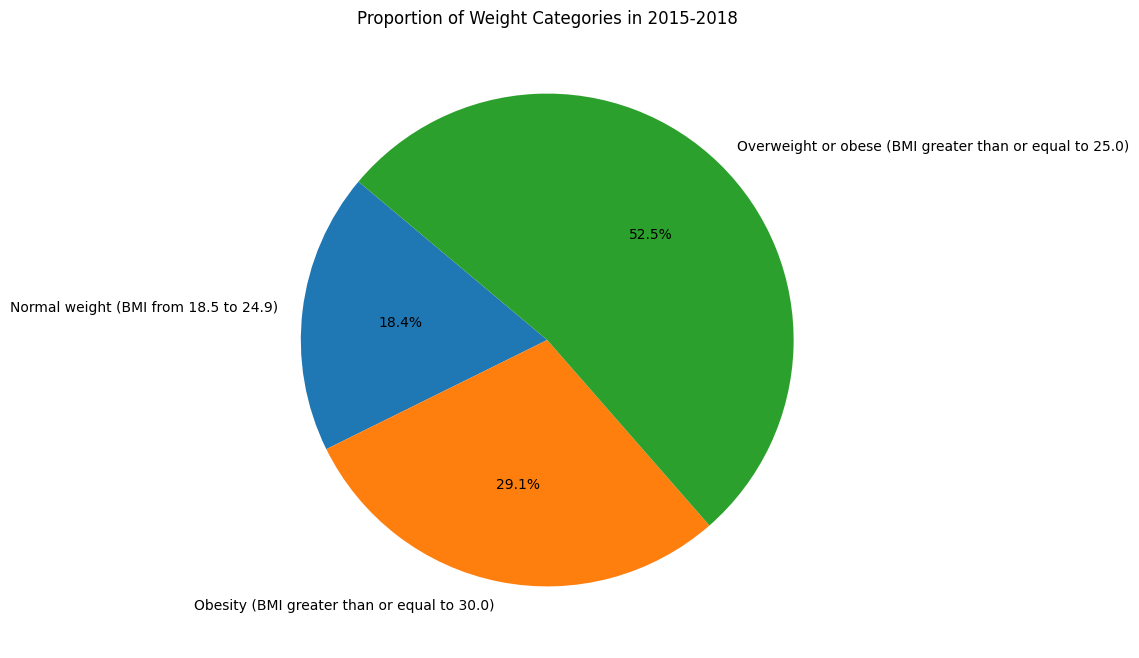

In [8]:
def latest_year_proportions_filtered(data):
    latest_year = data['YEAR'].max()
    # Filter for the specific categories
    filtered_data = data[data['PANEL'].isin(['Obesity (BMI greater than or equal to 30.0)',
                                             'Overweight or obese (BMI greater than or equal to 25.0)',
                                             'Normal weight (BMI from 18.5 to 24.9)'])]
    latest_data = filtered_data[filtered_data['YEAR'] == latest_year]
    proportions = latest_data.groupby('PANEL').sum()['ESTIMATE']
    return proportions, latest_year

# Applying the function
proportions, latest_year = latest_year_proportions_filtered(data)

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Proportion of Weight Categories in {latest_year}')
plt.show()


# Conclusion
Through the analysis of the dataset "Normal weight, overweight, and obesity among adults aged 20 and over, by selected characteristics, United States," several key insights have been revealed. These findings are instrumental for public health officials, policymakers, and healthcare providers in understanding and addressing the challenges related to weight management in the adult population. The data underscores the need for targeted health interventions and continued monitoring of weight trends to combat the rising prevalence of overweight and obesity, which are known risk factors for various chronic diseases.

In summary, the dataset not only highlights the current state of adult weight categories in the United States but also serves as a call to action for tailored health initiatives and policies to improve the overall health and well-being of the population.